## Use Case

At the DOODL Supermarket chain we would like to understand our customers better in order to optimize the layout, staffing and service of our supermarkets. 
Main business goals are:

1. Understand customer behavior.

2. Explain customer behavior to our non-data staff.

3. Optimize staffing so that the queues do not get unnecessary long.




## Bussiness Goal:

 Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:

1. Calculate the total number of customers in each section

2. Calculate the total number of customers in each section over time

3. Display the number of customers at checkout over time

4. Calculate the time each customer spent in the market

5. Calculate the total number of customers in the supermarket over time.

6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mesh

plt.rcParams['figure.figsize'] = (14,6)
%load_ext pycodestyle_magic

In [21]:
#Thanks Ana for the tip!
pip install pycodestyle_magic

### Data Exploration

#### Create a dataframe with all the weekdays.

In [23]:
monday = pd.read_csv("data/monday.csv", sep=";")
tuesday = pd.read_csv("data/tuesday.csv", sep=";")
wednesday = pd.read_csv("data/wednesday.csv", sep=";")
thursday = pd.read_csv("data/thursday.csv", sep=";")
friday = pd.read_csv("data/friday.csv", sep=";")

all_days = [monday, tuesday, wednesday, thursday, friday]

for weekday in all_days:
    weekday['timestamp'] = pd.to_datetime(weekday['timestamp'])
    weekday['hour'] = weekday['timestamp'].dt.hour
    all_customers = set(weekday.customer_no.values)
    checked_out_customers = set(weekday[weekday["location"] == "checkout"].customer_no.values)
    non_checked_out_customers = list(all_customers.difference(checked_out_customers))
    day = weekday[~weekday.loc[:, "customer_no"].isin(non_checked_out_customers)]

monday["day"] = "monday"
tuesday["day"] = "tuesday"
wednesday["day"] = "wednesday"
thursday["day"] = "thursday"
friday["day"] = "friday"

# combine the DataFrames
weekdays = monday.append(tuesday.append(wednesday.append(thursday.append(friday))))
#Change the customers_id's

In [2]:
weekdays["customer_no"] = weekdays["customer_no"].astype(str) + "_" + weekdays["day"]

In [3]:
weekdays

,timestamp,customer_no,location,hour,day
0,2019-09-02 07:03:00,1_monday,dairy,7,monday
1,2019-09-02 07:03:00,2_monday,dairy,7,monday
2,2019-09-02 07:04:00,3_monday,dairy,7,monday
3,2019-09-02 07:04:00,4_monday,dairy,7,monday
4,2019-09-02 07:04:00,5_monday,spices,7,monday
...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500_friday,dairy,21,friday
5121,2019-09-06 21:50:00,1507_friday,checkout,21,friday
5122,2019-09-06 21:50:00,1508_friday,checkout,21,friday
5123,2019-09-06 21:50:00,1509_friday,drinks,21,friday


In [4]:
#weekdays['minute'] = weekdays.index.minute

### 1. Total number of customers in each section

In [5]:
customers_in_each_section = weekdays["location"].value_counts().to_frame()
customers_in_each_section

,location
checkout,7417
fruit,5122
dairy,4679
drinks,3905
spices,3754


In [6]:
customers_in_each_section_day = weekdays.groupby(["day"])["location"].value_counts().to_frame()
customers_in_each_section_day

location
day       location          
friday    checkout      1502
          fruit         1057
          dairy          932
          drinks         844
          spices         790
monday    checkout      1437
          fruit         1005
          dairy          895
          drinks         797
          spices         750
thursday  checkout      1532
          fruit         1041
          dairy          965
          spices         790
          drinks         776
tuesday   checkout      1420
          fruit          976
          dairy          911
          drinks         713
          spices         694
wednesday checkout      1526
          fruit         1043
          dairy          976
          drinks         775
          spices         730

#### Plot the total number of customers in each section.

<AxesSubplot:title={'center':'Total Number of Customers in each Section'}>

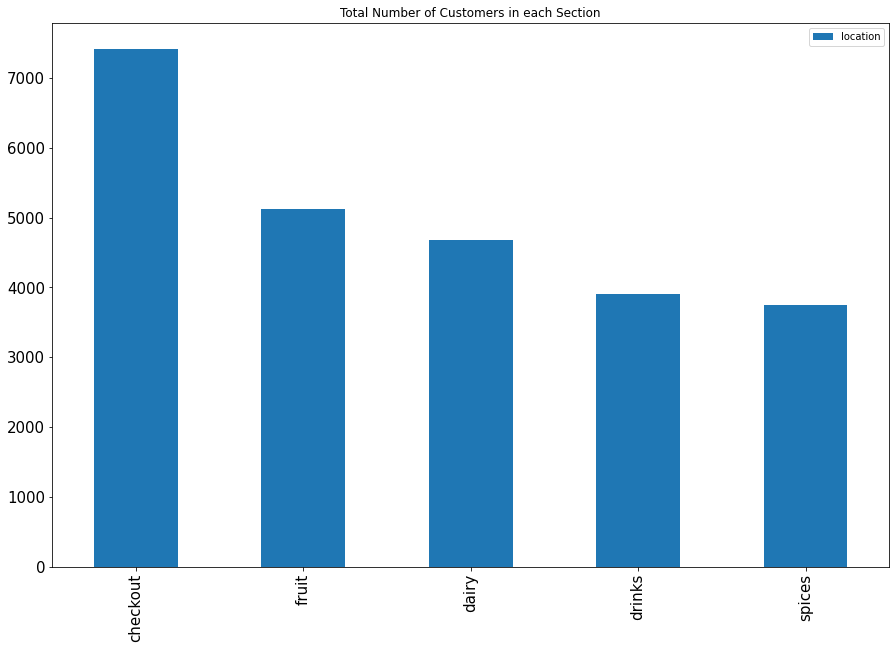

In [7]:
customers_in_each_section.plot(kind='bar', figsize= (15, 10), use_index=True, title= "Total Number of Customers in each Section", fontsize= 15)

<AxesSubplot:title={'center':'Total Number of Customers in each Section'}, xlabel='day,location'>

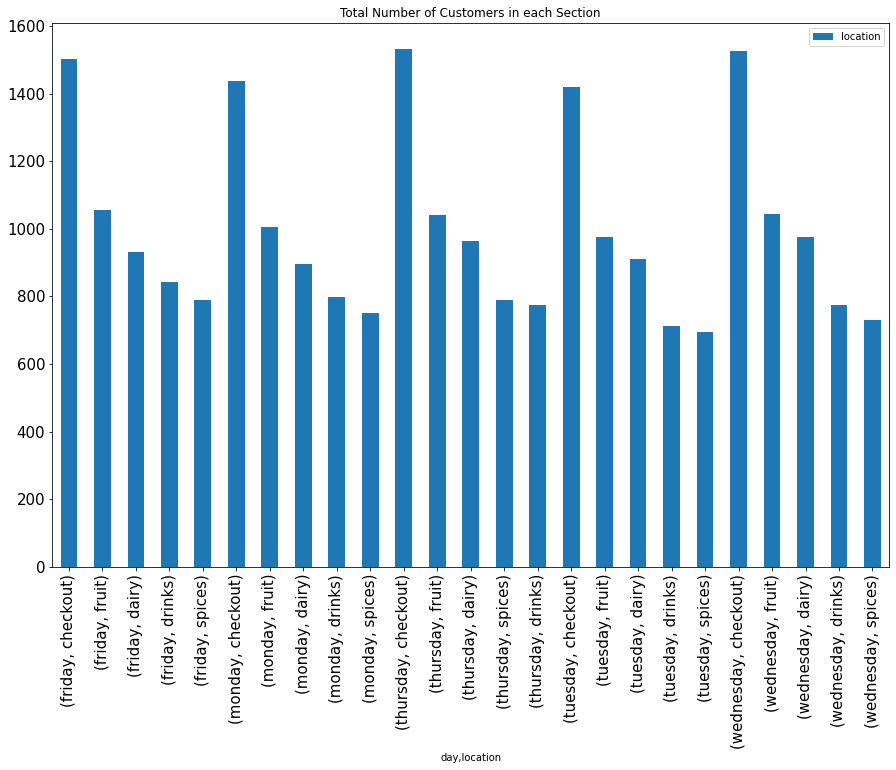

In [8]:
customers_in_each_section_day.plot(kind='bar', figsize= (15, 10), use_index=True, title= "Total Number of Customers in each Section", fontsize= 15)

<AxesSubplot:xlabel='location', ylabel='count'>

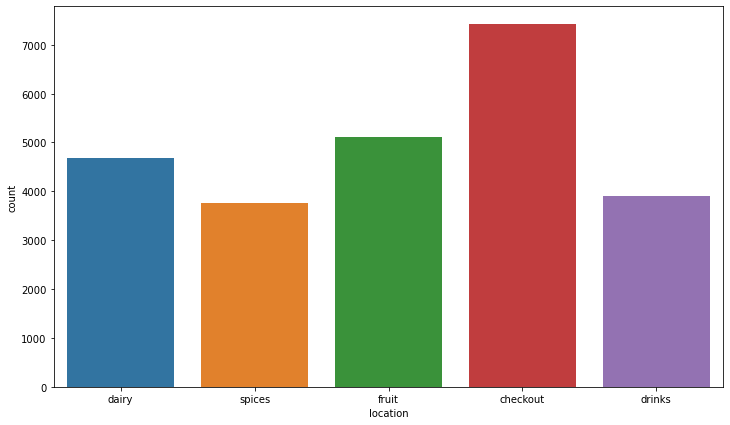

In [9]:
plt.figure(figsize=(12,7))           

sns.countplot(x='location',data=weekdays)

### 2. Total number of customers in each section over time

In [10]:
tncesot = weekdays.groupby(["hour", "location"])["customer_no"].count().to_frame()
tncesot

customer_no
hour location             
7    checkout          454
     dairy             275
     drinks            278
     fruit             299
     spices            238
...                    ...
21   checkout          305
     dairy             151
     drinks            180
     fruit             173
     spices            122

[75 rows x 1 columns]

In [17]:
weekdays['customer_no']

0          1_monday
1          2_monday
2          3_monday
3          4_monday
4          5_monday
           ...     
5120    1500_friday
5121    1507_friday
5122    1508_friday
5123    1509_friday
5124    1510_friday
Name: customer_no, Length: 24877, dtype: object

[Text(0.5, 1.0, 'Total number of customers in each section over time'),
 Text(0, 0.5, 'Amount of customers'),
 Text(0.5, 0, 'Hours')]

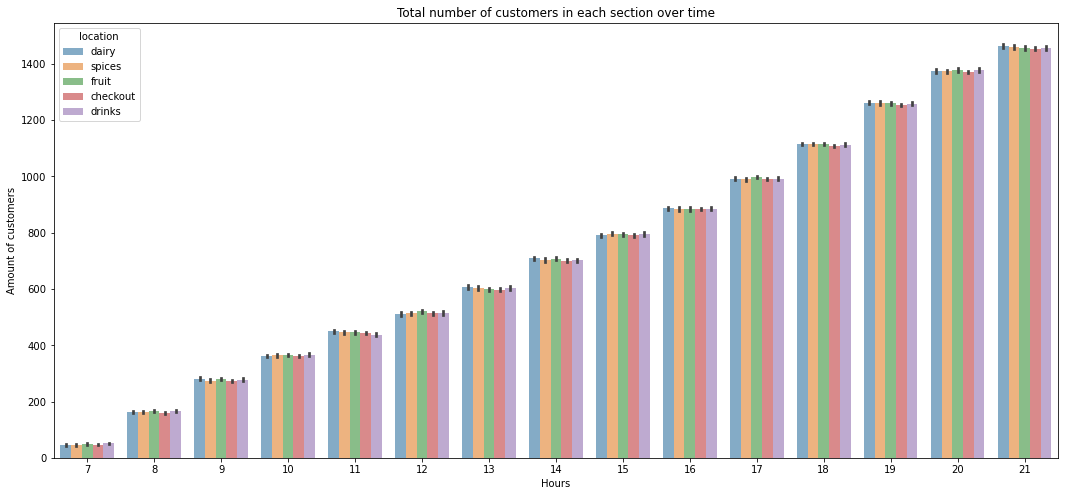

In [24]:
fig,ax = plt.subplots(figsize=(18,8))
sns.barplot(x='hour', y='customer_no', hue='location', data=weekdays, 
            alpha=0.6).set(title='Total number of customers in each section over time', 
            ylabel='Amount of customers', xlabel= 'Hours')

<AxesSubplot:xlabel='hour'>

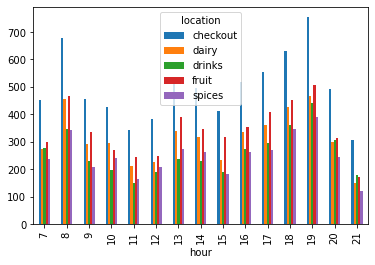

In [13]:
weekdays.groupby(['location','hour']).customer_no.count().unstack(0).plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1008x432 with 0 Axes>

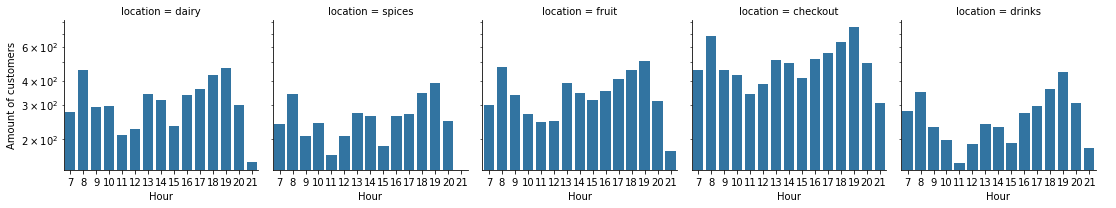

In [14]:
plt.figure(figsize=(14,6))    
grid = sns.FacetGrid(data=weekdays, col='location',  palette=['#FFAD11'] )   #plot the total number of customers in each section
grid.map_dataframe(sns.countplot, 'hour')                                        
grid.add_legend()                                                        #split the plots by locations
plt.yscale("log")
grid.set_xlabels("Hour")
grid.set_ylabels("Amount of customers")
sns.despine()
plt.show

### 3. Number of customers at checkout over time

<AxesSubplot:title={'center':'Total Number of Customers at Checkout in each Section Over Time'}, xlabel='day,hour'>

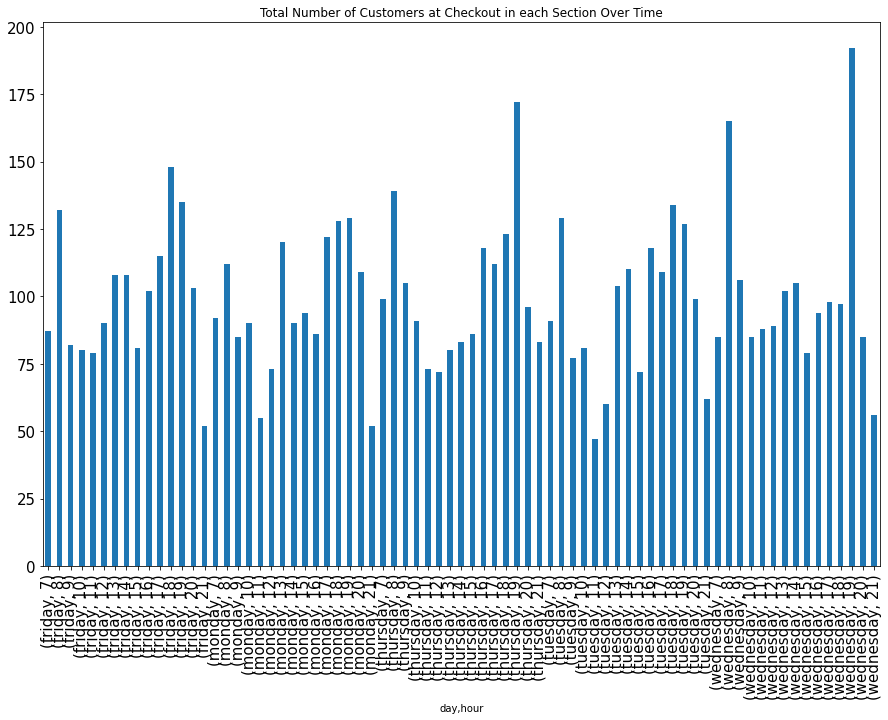

In [25]:
nccot = weekdays.groupby(by=["day", "hour", "location"])["customer_no"].count().unstack(2)["checkout"]
nccot.plot(kind='bar', figsize= (15, 10), use_index=True, title= "Total Number of Customers at Checkout in each Section Over Time", fontsize= 15)

In [ ]:
costumers_checkout=df.loc[df['location']=='checkout']
costumers_checkout

In [ ]:


sns.barplot(data=nccot #plot the number of customers in checkout section
             , x='hour', y= 'customer_no')



### 4. Calculate the time each customer spent in the market

In [ ]:
time_ = total.reset_index()
time_in_market = (
    time_.groupby(["customer_no", "day"])[["timestamp"]].last()
    - time_.groupby(["customer_no", "day"])[["timestamp"]].first()
)
time_in_market["counter"] = 1
time_in_market.head()
time_in_market["time_spent"] = time_in_market.timestamp.dt.seconds / 60
time_in_market.hist(column="time_spent", figsize=(12, 8), bins=50)
plt.xlabel("Time spent in minutes")
plt.ylabel("Nr. of customers")
plt.title("Distribution of time spent in the supermarket")
plt.show()

In [ ]:
duration = time_in_market.groupby("timestamp").count()
duration.shape
duration.reset_index(inplace=True)
duration["time_spent"] = duration.timestamp.dt.seconds / 60
duration.head()

In [ ]:
duration = df.reset_index()
stay = (duration.groupby(['customer_no', "day"])['timestamp'].last() - duration.groupby(['customer_no', "day"])['timestamp'].first())
stay.head(3)

In [ ]:
duration['stay_duration'] = duration['departure'] - duration['arrival']
duration.set_index("customer_no", inplace=True)
duration

In [ ]:
tcsm = stay.to_frame()
tcsm

In [ ]:
stay.plot(x="customer_no", y="timestamp", figsize=(15, 10))  
plt.ylabel("Time spent in minutes")
plt.xlabel("Nr. of customers")
plt.title("Distribution of time spent in the supermarket")
plt.show()

### 5. Total number of customers in the supermarket over time

In [ ]:
tncsot = df.groupby(df["hour"])['customer_no'].count().to_frame()
tncsot.plot(kind='bar', figsize= (15, 10), use_index=True, title= "Total Number of Customers in Supermarket Over Time", fontsize= 15)

### 6. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [ ]:
df.head()

In [ ]:
first= df.groupby(["customer_no", "day"])["hour", "location"].first()
first.head()

In [ ]:
weekdays['order'] = weekdays.groupby('customer_no')['location'].shift().to_frame()
weekdays['order'].replace(np.NaN, 'first', inplace=True)

In [ ]:
weekdays['following'] = weekdays.groupby('customer_no')['location'].shift(-1).to_frame()
weekdays

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='hour', y='location', hue='order', data=weekdays,
            alpha=0.6).set(title='The sections visited first and following times', 
            ylabel='Sections', xlabel= 'Hours')

In [ ]:
g= sns.FacetGrid(weekdays, col='day')
g.map(sns.histplot,'order')
plt.yscale("log")
plt.show

In [ ]:
weekdays.groupby(['order','day']).order.count().unstack(0).plot.bar() 

#### Crosstab function and some other approaches!

In [ ]:
pd.crosstab([df.customer_no, df.hour], [df.location], dropna=False)

In [ ]:
total = pd.crosstab(df.hour, df.location, values = df.customer_no, aggfunc='count',margins=True, margins_name= 'Total', dropna=True)


In [ ]:
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25), (0.75, 0, 0.75), (0.3010, 0.7450, 0.9330) ,
            (0, 0.4470, 0.7410), (1, 0, 0), (0, 0.75, 0.75)] *5

total.plot(kind='bar', figsize= (15, 10), use_index=True, title= "Total Number of Customers in each Section", fontsize= 15, color = my_colors, stacked=True)


####  Calculate the total number of customers in the supermarket over time.


In [ ]:
df['time_leaving'] = df.groupby(['customer_no'])['timestamp'].min()
df['time_arrival'] = df.groupby(['customer_no'])['timestamp'].max()
df['arrival'] = pd.to_datetime(df['time_arrival'])
df['departure'] = pd.to_datetime(df['time_leaving'])
df['stay_duration'] = df['arrival'] - df['departure']

df = df.drop(columns=['time_arrival', 'time_leaving'])